## Set the computations 

In [1]:
# Import modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
%matplotlib inline 

In [2]:
# Set visuales 
coloors = ['#739354', '#875590', '#7dd3ec','#f5c9d0' , '#7dd3ec']

In [3]:
# read major final demand sectors 
sectors = pd.read_excel('../Data/Meta.xlsx', sheet_name = 'Data').drop('Eora_classification', axis =1)
sec_map = {1: 'Primary industry', 21 : 'Light manufacturing',23 : 'Heavey manufacturing', 3 : 'Tertiary industry' }
sectors['Industry_category'] = sectors['Industry_category'].map(sec_map)
sectors.head(3)

,Sector,Industry_category
0,Food,Primary industry
1,Food,Primary industry
2,Goods,Primary industry


## 1. CES data

In [71]:
# Set general path 
ces_path = '../Data/CES/'
# Read the CES data 
y = pd.read_csv(ces_path + 'urban.ces.csv')
info = pd.read_csv('../infos.csv')
y = pd.merge(info, y, left_on = 'Eora_country', right_on = 'Country iso3').drop('Eora_country', axis = 1)
y.rename(columns = {'Country iso3': 'iso'}, inplace = True)
y.head(3)

,country,Year,City,Category,iso,0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
0,Algeria,2011,Algiers,UMIC,DZA,0.0,0.0,0.0,721.627741,147.509079,...,0.0,0.000000,103.313939,103.313939,0.0,0.0,153.144011,0.0,123.104751,0.0
1,Tunisia,2010,Tunis,LMIC,TUN,0.0,0.0,0.0,656.001118,185.133436,...,0.0,74.751991,198.407154,122.956546,0.0,0.0,270.364678,0.0,9.082018,0.0
2,Morocco,2014,Casablanca,LMIC,MAR,0.0,0.0,0.0,862.619048,85.476190,...,0.0,0.000000,191.666667,64.761905,0.0,0.0,409.285714,0.0,269.404762,0.0


## 2. Compute the TIV ($F$)

For this anlysis we're using [Eora26](https://worldmrio.com/eora26/) (v199.82)

In [5]:
# Read modules 
import numpy as np
import pandas as pd
import os
import re

We need to compute the the Total Intensity Vector $(F)$ for these countries: *['CIV', 'MDV', 'MEX', 'DZA', 'LKA', 'CHN', 'BGD', 'ALB', 'ZWE','EGY', 'ZAF', 'MAR', 'NAM', 'BWA', 'VNM', 'ZMB', 'MNE', 'ASM', 'CRI', 'GEO', 'TUN']*

To compute the the TIF, we need to preform the following operations: 
- compute the Xout 
- compute the direct intensity vector (f) 
- comput technical coefficient matrix
- compute Wassily Leontief inverse 
- compute the Total intesnity verctor 

In [6]:
# set paths 
bp_path = '../Data/Eora/Eora_BP/'

# Read the index 
index = [file for file in os.listdir(bp_path)]
index

containers = {}
for i in index:
    path = [file for file in os.listdir(bp_path + i) if any(map(str.isdigit, file))]
    print(f' \n i == {i} \n')
    container = {}
    containers[i] = container
    for m in path:
        print(f'm == {m}')
        read = pd.read_csv(bp_path + i + '/' + m, delimiter = '\t', header = None)
        container[m.split('_')[-1].split('.')[0]] = read

 
 i == Eora26_2009_bp 

m == Eora26_2009_bp_FD.txt
m == Eora26_2009_bp_Q.txt
m == Eora26_2009_bp_QY.txt
m == Eora26_2009_bp_T.txt
m == Eora26_2009_bp_VA.txt
 
 i == Eora26_2010_bp 

m == Eora26_2010_bp_FD.txt
m == Eora26_2010_bp_Q.txt
m == Eora26_2010_bp_QY.txt
m == Eora26_2010_bp_T.txt
m == Eora26_2010_bp_VA.txt
 
 i == Eora26_2011_bp 

m == Eora26_2011_bp_FD.txt
m == Eora26_2011_bp_Q.txt
m == Eora26_2011_bp_QY.txt
m == Eora26_2011_bp_T.txt
m == Eora26_2011_bp_VA.txt
 
 i == Eora26_2012_bp 

m == Eora26_2012_bp_FD.txt
m == Eora26_2012_bp_Q.txt
m == Eora26_2012_bp_QY.txt
m == Eora26_2012_bp_T.txt
m == Eora26_2012_bp_VA.txt
 
 i == Eora26_2013_bp 

m == Eora26_2013_bp_FD.txt
m == Eora26_2013_bp_Q.txt
m == Eora26_2013_bp_QY.txt
m == Eora26_2013_bp_T.txt
m == Eora26_2013_bp_VA.txt
 
 i == Eora26_2014_bp 

m == Eora26_2014_bp_FD.txt
m == Eora26_2014_bp_Q.txt
m == Eora26_2014_bp_QY.txt
m == Eora26_2014_bp_T.txt
m == Eora26_2014_bp_VA.txt
 
 i == Eora26_2015_bp 

m == Eora26_2015_bp_FD.txt


In [7]:
# get the xout for the basic prices and purchaser prices 

BP = {}
print('BB values')
# set the computation code 
for i in containers.keys():
    # print('---')
    # print(i)
    # print('---')
    for m in containers.get(i):
        """ interate over the dic and return the xout for each years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(containers.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(containers.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        BP[i.split('_')[1]] = xout

BB values


In [8]:
### read the tables in PP 

# set paths 
pp_path = '../Data/Eora/Eora_PP/'

# Read the index 
dex = [file for file in os.listdir(pp_path)]

conts = {}
for i in dex:
    path = [file for file in os.listdir(pp_path + i) if any(map(str.isdigit, file))]
    print(f' \n i == {i} \n')
    container = {}
    conts[i] = container
    for m in path:
        print(f'm == {m}')
        read = pd.read_csv(pp_path + i + '/' + m, delimiter = '\t', header = None)
        container[m.split('_')[-1].split('.')[0]] = read

 
 i == Eora26_2009_pp 

m == Eora26_2009_pp_FD.txt
m == Eora26_2009_pp_Q.txt
m == Eora26_2009_pp_QY.txt
m == Eora26_2009_pp_T.txt
m == Eora26_2009_pp_VA.txt
 
 i == Eora26_2010_pp 

m == Eora26_2010_pp_FD.txt
m == Eora26_2010_pp_Q.txt
m == Eora26_2010_pp_QY.txt
m == Eora26_2010_pp_T.txt
m == Eora26_2010_pp_VA.txt
 
 i == Eora26_2011_pp 

m == Eora26_2011_pp_FD.txt
m == Eora26_2011_pp_Q.txt
m == Eora26_2011_pp_QY.txt
m == Eora26_2011_pp_T.txt
m == Eora26_2011_pp_VA.txt
 
 i == Eora26_2012_pp 

m == Eora26_2012_pp_FD.txt
m == Eora26_2012_pp_Q.txt
m == Eora26_2012_pp_QY.txt
m == Eora26_2012_pp_T.txt
m == Eora26_2012_pp_VA.txt
 
 i == Eora26_2013_pp 

m == Eora26_2013_pp_FD.txt
m == Eora26_2013_pp_Q.txt
m == Eora26_2013_pp_QY.txt
m == Eora26_2013_pp_T.txt
m == Eora26_2013_pp_VA.txt
 
 i == Eora26_2014_pp 

m == Eora26_2014_pp_FD.txt
m == Eora26_2014_pp_Q.txt
m == Eora26_2014_pp_QY.txt
m == Eora26_2014_pp_T.txt
m == Eora26_2014_pp_VA.txt
 
 i == Eora26_2015_pp 

m == Eora26_2015_pp_FD.txt


In [9]:
PP = {}
print('PP values')
# set the computation code 
for i in conts.keys():
    print('---')
    print(i)
    print('---')
    for m in conts.get(i):
        """ interate over the dic and return the xout for each of the years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(conts.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(conts.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        PP[i.split('_')[1]] = xout

PP values
---
Eora26_2009_pp
---
---
Eora26_2010_pp
---
---
Eora26_2011_pp
---
---
Eora26_2012_pp
---
---
Eora26_2013_pp
---
---
Eora26_2014_pp
---
---
Eora26_2015_pp
---


In [38]:
# compte the fraction PP/BP
years = np.arange(2009, 2016).astype('str')
frac = {}
for year in years: 
    frac[year] = BP.get(year) / PP.get(year)

In [14]:
## check the Q-values index
Q = pd.read_csv('../Data/Eora/Eora_BP/Eora26_2009_bp/Eora26_2009_bp_Q.txt', delimiter = '\t', header = None)
I = pd.read_csv('../Data/Eora/Eora_BP/Eora26_2009_bp/labels_Q.txt', delimiter = '\t', header = None)
lo = pd.concat([I, Q], axis = 1)
lo.iloc[2501,]

0       WFN: Total water footprint (Mm3/yr) - Grey
1                                            Total
2                                              NaN
0                                            335.7
1                                          0.25441
                           ...                    
4910                                        22.022
4911                                           0.0
4912                                           0.0
4913                                           0.0
4914                                             0
Name: 2501, Length: 4918, dtype: object

In [15]:
Blue = {}
print('Blue water footprint')
# set the computation code 
for i in containers.keys():
    # print('---')
    # print(i)
    # print('---')
    for m in containers.get(i):
        """ interate over the dic and return the TIV for each of the years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(containers.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(containers.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        # compute direct intensity vector (f) 
        f = np.zeros_like(xout)
        np.divide(np.array(containers.get(i).get('Q'))[2500,:][:, np.newaxis], xout, out=f, where= xout != 0)
        # comput technical coefficient matrix 
        A = np.empty((4915, 4915))
        np.divide(containers.get(i).get('T'), xout, out = A)
        A = np.array(pd.DataFrame(A).fillna(0))
        # creating identity matrix 
        I = np.eye(4915)
        # compute the Wassily Leontief inverse 
        L = np.linalg.inv((I - A)) 
        # compute the Total intesnity verctor 
        F = L.dot(f)
        Blue[i.split('_')[1]] = F

Blue water footprint


In [16]:
Grey = {}
# set the computation code 
print('Grey water footprint')
for i in containers.keys():
    print('---')
    print(i)
    print('---')
    for m in containers.get(i):
        """ interate over the dic and return the TIV for each of the years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(containers.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(containers.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        # compute direct intensity vector (f) 
        f = np.zeros_like(xout)
        np.divide(np.array(containers.get(i).get('Q'))[2501,:][:, np.newaxis], xout, out=f, where= xout != 0)
        # comput technical coefficient matrix 
        A = np.empty((4915, 4915))
        np.divide(containers.get(i).get('T'), xout, out = A)
        A = np.array(pd.DataFrame(A).fillna(0))
        # creating identity matrix 
        I = np.eye(4915)
        # compute the Wassily Leontief inverse 
        L = np.linalg.inv((I - A)) 
        # compute the Total intesnity verctor 
        F = L.dot(f)
        Grey[i.split('_')[1]] = F

Grey water footprint
---
Eora26_2009_bp
---
---
Eora26_2010_bp
---
---
Eora26_2011_bp
---
---
Eora26_2012_bp
---
---
Eora26_2013_bp
---
---
Eora26_2014_bp
---
---
Eora26_2015_bp
---


In [72]:
## import the index of countries & sectors 
index = pd.read_csv('../Data/Eora/Eora_BP/Eora26_2009_bp/labels_T.txt', delimiter = '\t', header = None).iloc[:,:-1]
index.columns = ['country', 'iso3', 'industries', 'sector']
index.head(3)

,country,iso3,industries,sector
0,Afghanistan,AFG,Industries,Agriculture
1,Afghanistan,AFG,Industries,Fishing
2,Afghanistan,AFG,Industries,Mining and Quarrying


In [73]:
## add metadata to the frac dic 
for i in frac.keys():
    frac[i] = pd.concat([index, pd.DataFrame(frac.get(i))], axis = 1)

### Convert PP to BP

In [76]:
y.head(2)

,country,Year,City,Category,iso,0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
0,Algeria,2011,Algiers,UMIC,DZA,0.0,0.0,0.0,721.627741,147.509079,...,0.0,0.000000,103.313939,103.313939,0.0,0.0,153.144011,0.0,123.104751,0.0
1,Tunisia,2010,Tunis,LMIC,TUN,0.0,0.0,0.0,656.001118,185.133436,...,0.0,74.751991,198.407154,122.956546,0.0,0.0,270.364678,0.0,9.082018,0.0


In [85]:
y[y['iso'] == "DZA"].iloc[:,5:]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,721.627741,147.509079,25.370904,0.0,0.0,25.370904,0.0,...,0.0,0.0,103.313939,103.313939,0.0,0.0,153.144011,0.0,123.104751,0.0


In [82]:
np.array(frac.get('2011').query(f'iso3 == "DZA"').iloc[:,-1])[:, np.newaxis]

array([[ 0.85496926],
       [ 0.75773695],
       [ 0.92375771],
       [ 0.65369693],
       [ 0.46346535],
       [ 0.79771419],
       [ 0.49540568],
       [ 0.83375168],
       [ 0.70889649],
       [ 0.76008235],
       [ 0.59232062],
       [ 0.5350078 ],
       [ 0.99390315],
       [ 0.99353064],
       [ 0.66280325],
       [ 1.42734298],
       [ 5.51926543],
       [-3.02308717],
       [-1.08041005],
       [ 0.9718665 ],
       [ 0.95887618],
       [ 0.99783028],
       [ 0.97807222],
       [ 0.89593063],
       [ 0.98242427],
       [ 0.1521647 ]])

In [81]:
y[y['iso'] == "DZA"]['City'].item()

'Algiers'

In [86]:
y_adjusted = {}
# downscale from PP to BP 
for name in y['iso'].unique():
    year = y[y['iso'] == name]['Year'].unique().item()
    f = np.array(frac.get(str(year)).query(f'iso3 == "{name}"').iloc[:,-1])[:, np.newaxis]
    yy = np.array(y[y['iso'] == f"{name}"].iloc[:,5:].T)
    corrected = yy * f
    y_adjusted[name] = corrected

In [92]:
y_out = []

for i in y_adjusted.keys():
    y_out.append(pd.DataFrame(y_adjusted.get(i)))

In [112]:
y_ds = pd.concat(y_out, axis = 1)
y_ds.columns = y.iso
y_ds = abs(y_ds)
y_ds = y_ds.T.reset_index()
y_ds

,iso,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,DZA,0.0,0.0,0.0,471.725839,68.365347,20.238730,0.0,0.0,17.985344,...,0.0,0.000000,111.621417,100.407356,0.0,0.0,149.785903,0.0,120.941096,0.0
1,TUN,0.0,0.0,0.0,431.164877,122.339001,39.754021,0.0,0.0,39.476968,...,0.0,156.918419,150.273025,117.296729,0.0,0.0,255.939212,0.0,8.706206,0.0
2,MAR,0.0,0.0,0.0,573.484572,49.706891,0.000000,0.0,0.0,60.793903,...,0.0,0.000000,239.045367,62.642211,0.0,0.0,394.032795,0.0,263.552599,0.0
3,MAR,0.0,0.0,0.0,595.191667,39.244213,0.000000,0.0,0.0,47.960535,...,0.0,0.000000,188.712212,49.451650,0.0,0.0,311.024595,0.0,208.059811,0.0
4,MAR,0.0,0.0,0.0,374.743596,32.482553,0.000000,0.0,0.0,39.691664,...,0.0,0.000000,156.225798,40.924709,0.0,0.0,257.462266,0.0,172.211767,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CHN,0.0,0.0,0.0,906.575289,209.951740,89.696886,0.0,0.0,87.375759,...,0.0,0.000000,1130.979325,167.428265,0.0,0.0,487.010721,0.0,81.014292,0.0
182,CHN,0.0,0.0,0.0,1179.214238,279.699251,102.774286,0.0,0.0,100.114749,...,0.0,0.000000,1623.879388,240.396356,0.0,0.0,615.238206,0.0,111.605158,0.0
183,CHN,0.0,0.0,0.0,901.139169,225.881559,66.024199,0.0,0.0,64.315661,...,0.0,0.000000,902.207363,133.561251,0.0,0.0,210.851259,0.0,89.581696,0.0
184,CHN,0.0,0.0,0.0,808.067535,260.823507,80.583457,0.0,0.0,78.498163,...,0.0,0.000000,1255.038704,185.793805,0.0,0.0,502.810562,0.0,70.877287,0.0


## Computing the virtual water -Grey & Bleu- 

In [105]:
## add the countries and the sectors names 
for i in Blue.keys():
    Blue[i] = pd.concat([index, pd.DataFrame(Blue.get(i))], axis = 1)
    
for i in Grey.keys():
    Grey[i] = pd.concat([index, pd.DataFrame(Grey.get(i))], axis = 1)   

In [106]:
# get the TIV for each country & year 
info = pd.read_csv('../infos.csv')
info.head(3)

,country,Eora_country,Year
0,Algeria,DZA,2011
1,Tunisia,TUN,2010
2,Morocco,MAR,2014


In [107]:
## get the data for each year & country 
Bleu_F = {}
for i in info['Eora_country'].unique():
    Year = info[info['Eora_country'] == i].Year.item()
    Bleu_F[i] = Blue.get(f"{Year}").query(f'iso3 == "{i}"')[['iso3', 'sector', 0]]
    
Grey_F = {}
for i in info['Eora_country'].unique():
    Year = info[info['Eora_country'] == i].Year.item()
    Grey_F[i] = Grey.get(f"{Year}").query(f'iso3 == "{i}"')[['iso3', 'sector', 0]]

In [119]:
y_ds[y_ds['iso'] == "CHN"].iloc[:,2:].T

,157,158,159,160,161,162,163,164,165,166,...,176,177,178,179,180,181,182,183,184,185
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,783.312731,1170.139425,921.860723,1076.804753,725.429744,1147.167435,773.580323,702.837698,972.554002,619.717670,...,700.748006,764.052500,701.464054,788.836530,555.887101,906.575289,1179.214238,901.139169,808.067535,728.820013
4,181.897256,352.883676,256.145487,199.259122,225.608788,183.397495,108.371867,169.922614,113.186273,194.267415,...,235.810418,239.247331,200.541145,245.671085,220.398864,209.951740,279.699251,225.881559,260.823507,145.468706
5,68.380353,163.493431,95.772505,96.468978,80.724233,101.144241,67.017044,80.798326,70.958787,80.138899,...,81.124335,74.737526,87.133271,106.004737,65.787101,89.696886,102.774286,66.024199,80.583457,67.906159
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,66.610844,0.000000,93.294157,93.972607,78.635296,98.526887,65.282814,78.707472,69.122555,78.065109,...,79.025044,72.803509,84.878484,103.261605,64.084699,87.375759,100.114749,64.315661,78.498163,66.148921
9,0.000000,168.048399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [152]:
## get the footprints 

Bleu_foot = {}

for name in Bleu_F.keys(): 
    city = np.array(y_ds[y_ds['iso'] == f'{name}'].iloc[:,1:].T)
    TIF = np.array(Bleu_F.get(f'{name}')[[0]])
    com = pd.DataFrame(city * TIF)
#     com.columns = y[y['iso'] == f'{name}'].iloc[:,1:].T.columns   
    Bleu_foot[name] = com
    
Grey_foot = {}

for name in Grey_F.keys(): 
    city = np.array(y_ds[y_ds['iso'] == f'{name}'].iloc[:,1:].T)
    TIF = np.array(Grey_F.get(f'{name}')[[0]])
    com = pd.DataFrame(city * TIF)
#     com.columns = y[y['Country iso3'] == f'{name}'].iloc[:,2:].T.columns   
    Grey_foot[name] = com

In [153]:
## take the dfs 
Bleu = pd.concat([Bleu_foot.get(i) for i in Bleu_foot.keys()], axis =1)
Grey = pd.concat([Grey_foot.get(i) for i in Grey_foot.keys()], axis =1)

In [154]:
Bleu = pd.concat([sectors, Bleu * 1000], axis =1)
Grey = pd.concat([sectors, Grey * 1000], axis =1) 

In [167]:
Bleu.columns = ['Sector', 'Indus_Sector','Algiers',
 'Tunis',
 'Casablanca',
 'Guelmim',
 'Khenifra',
 'Laayoun',
 'Marrakesh',
 'Oriental',
 'Souss',
 'Tafilalet',
 'Tangier',
 'Berat',
 'Diber',
 'Durres',
 'Elbasan',
 'Gjirokaster',
 'Korce',
 'Kukes',
 'Lezhe',
 'Shkoder',
 'Tirana',
 'Vlore',
 'Barishal',
 'Chittagong',
 'Dhaka',
 'Khulna',
 'Rajshahi',
 'Rangpur',
 'Sylhet',
 'Gaborone',
 'San Jose',
 'Abidjan',
 'Agneby-Tiassa',
 'Bafing',
 'Bagoue',
 'Belier',
 'Bere',
 'Boukani',
 'Cavally',
 'Folon',
 'Gbeke',
 'Gbokie',
 'Goh',
 'Gontougo',
 'Grand-Ponts',
 'Guemon',
 'Hambol',
 'Haut-Sassandra',
 'Iffou',
 'Indenie-Djuablin',
 'Kabadougou',
 'La Me',
 'Loh-Djiboua',
 'Marahoue',
 'Moronou',
 'N-zi',
 'Nawa',
 'Poro',
 'San-Pedro',
 'Sud-Comoe',
 'Tchologo',
 'Tonkpi',
 'Worodougou',
 'Yamoussoukro',
 'Addu',
 'Atolls',
 'Faadhippolhu',
 'Felidhy Atoll',
 'Gnaviyani',
 'Hadhdhuumathi',
 'Kolhumadulu',
 'Male',
 'Mulakatholhu',
 'Montenegro',
 'Erongo',
 'Hardap',
 'Keras',
 'Kunene',
 'Omaheke',
 'Omusti',
 'Oshana',
 'Oshikoto',
 'Otjiwarongo',
 'Zambezi',
 'Cape Town',
 'Gauteng',
 'Limpopo',
 'Mpumalang',
 'Amparai',
 'Anuradhapura',
 'Badulla',
 'Batticaloa',
 'Colombo',
 'Galle',
 'Gampaha',
 'Hambantota',
 'Jaffna',
 'Kalutara',
 'Kandy',
 'Kegalla',
 'Kilinochchi',
 'Kurunegala',
 'Mannar',
 'Matale',
 'Matara',
 'Monaragala',
 'Mullaitivu',
 'Nuwar Eliya',
 'Polonnaruwa',
 'Puttalama',
 'Ratnapura',
 'Trincomalee',
 'Vavuniya',
 'Ha Noi',
 'Lusaka',
 'Tbilisi',
 'Aguascalientes',
 'Baja California Sur',
 'Baja California',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Cuidad de Mexico',
 'Durango',
 'Guanajuato',
 'Hidalgo',
 'Leon',
 'Melchor Ocampo',
 'Morelos',
 'Nayarit',
 'Oaxaca',
 'Ojuelos de Jalisco',
 'Puebla',
 'Queretaro',
 'Quintana Roo',
 'San Luis Potosi',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaumipas',
 'Tlaxcala',
 'Veracruz',
 'Vicente Guerrero',
 'Yucatan',
 'Zacatlan',
 'Byo',
 'Hre',
 'Mach-Central',
 'Manicaland',
 'Mash-West',
 'Mash',
 'Mat-North',
 'Mat-South',
 'Mavingo',
 'Mid-lands',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan']


In [169]:
Grey.columns = ['Sector', 'Indus_Sector','Algiers',
 'Tunis',
 'Casablanca',
 'Guelmim',
 'Khenifra',
 'Laayoun',
 'Marrakesh',
 'Oriental',
 'Souss',
 'Tafilalet',
 'Tangier',
 'Berat',
 'Diber',
 'Durres',
 'Elbasan',
 'Gjirokaster',
 'Korce',
 'Kukes',
 'Lezhe',
 'Shkoder',
 'Tirana',
 'Vlore',
 'Barishal',
 'Chittagong',
 'Dhaka',
 'Khulna',
 'Rajshahi',
 'Rangpur',
 'Sylhet',
 'Gaborone',
 'San Jose',
 'Abidjan',
 'Agneby-Tiassa',
 'Bafing',
 'Bagoue',
 'Belier',
 'Bere',
 'Boukani',
 'Cavally',
 'Folon',
 'Gbeke',
 'Gbokie',
 'Goh',
 'Gontougo',
 'Grand-Ponts',
 'Guemon',
 'Hambol',
 'Haut-Sassandra',
 'Iffou',
 'Indenie-Djuablin',
 'Kabadougou',
 'La Me',
 'Loh-Djiboua',
 'Marahoue',
 'Moronou',
 'N-zi',
 'Nawa',
 'Poro',
 'San-Pedro',
 'Sud-Comoe',
 'Tchologo',
 'Tonkpi',
 'Worodougou',
 'Yamoussoukro',
 'Addu',
 'Atolls',
 'Faadhippolhu',
 'Felidhy Atoll',
 'Gnaviyani',
 'Hadhdhuumathi',
 'Kolhumadulu',
 'Male',
 'Mulakatholhu',
 'Montenegro',
 'Erongo',
 'Hardap',
 'Keras',
 'Kunene',
 'Omaheke',
 'Omusti',
 'Oshana',
 'Oshikoto',
 'Otjiwarongo',
 'Zambezi',
 'Cape Town',
 'Gauteng',
 'Limpopo',
 'Mpumalang',
 'Amparai',
 'Anuradhapura',
 'Badulla',
 'Batticaloa',
 'Colombo',
 'Galle',
 'Gampaha',
 'Hambantota',
 'Jaffna',
 'Kalutara',
 'Kandy',
 'Kegalla',
 'Kilinochchi',
 'Kurunegala',
 'Mannar',
 'Matale',
 'Matara',
 'Monaragala',
 'Mullaitivu',
 'Nuwar Eliya',
 'Polonnaruwa',
 'Puttalama',
 'Ratnapura',
 'Trincomalee',
 'Vavuniya',
 'Ha Noi',
 'Lusaka',
 'Tbilisi',
 'Aguascalientes',
 'Baja California Sur',
 'Baja California',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Cuidad de Mexico',
 'Durango',
 'Guanajuato',
 'Hidalgo',
 'Leon',
 'Melchor Ocampo',
 'Morelos',
 'Nayarit',
 'Oaxaca',
 'Ojuelos de Jalisco',
 'Puebla',
 'Queretaro',
 'Quintana Roo',
 'San Luis Potosi',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaumipas',
 'Tlaxcala',
 'Veracruz',
 'Vicente Guerrero',
 'Yucatan',
 'Zacatlan',
 'Byo',
 'Hre',
 'Mach-Central',
 'Manicaland',
 'Mash-West',
 'Mash',
 'Mat-North',
 'Mat-South',
 'Mavingo',
 'Mid-lands',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan']


In [171]:
Bleu = Bleu.melt(id_vars = ['Sector', 'Indus_Sector'], var_name = 'City')
Bleu['Type'] = 'Bleu water'
Grey = Grey.melt(id_vars = ['Sector', 'Indus_Sector'], var_name = 'City')
Grey['Type'] = 'Grey water'

In [172]:
tot = pd.concat([Bleu, Grey], axis = 0)

In [173]:
tot

,Sector,Indus_Sector,City,value,Type
0,Food,Primary industry,Algiers,0.000000,Bleu water
1,Food,Primary industry,Algiers,0.000000,Bleu water
2,Goods,Primary industry,Algiers,0.000000,Bleu water
3,Food,Light manufacturing,Algiers,94.779417,Bleu water
4,Textiles,Light manufacturing,Algiers,1.234991,Bleu water
...,...,...,...,...,...
4831,Services,Tertiary industry,Yunnan,0.000000,Grey water
4832,Services,Tertiary industry,Yunnan,15.023716,Grey water
4833,Goods,Tertiary industry,Yunnan,0.000000,Grey water
4834,Others,Light manufacturing,Yunnan,0.009688,Grey water


In [179]:
tot.to_excel('../Output/ds.xlsx', index = False)

## EDA

In [4]:
ds = pd.read_excel('../Output/ds.xlsx')
ds = ds[~(ds['City'].isin(['Colombo', 'Gampaha',
                                 'Kalutara', 'Trincomalee',
                                 'Matara']))]
ds.head(3)

,Sector,Indus_Sector,City,value,Type
0,Food,Primary industry,Algiers,0.0,Bleu water
1,Food,Primary industry,Algiers,0.0,Bleu water
2,Goods,Primary industry,Algiers,0.0,Bleu water


### Top 20 cities

In [53]:
ds.query('Type == "Bleu water"').groupby('City').sum().sort_values(by = 'value', ascending =False).head(20)

,value
City,
Beijing,328.454749
Tunis,313.652294
Casablanca,301.116559
Guelmim,287.649814
Tangier,285.638934
Atolls,275.773331
Guangdong,267.420180
Tianjin,259.893672
Marrakesh,252.239746


In [49]:
d

,City,Grey water,Bleu water
0,Atolls,667.958257,275.773331
1,Beijing,622.843176,328.454749
2,Montenegro,576.366783,194.147734
3,Male,558.498669,228.698539
4,Guangdong,516.647298,267.420180
5,Tianjin,489.246291,259.893672
6,Jiangsu,486.802089,248.048001
7,Fujian,446.194097,238.838972
8,Inner Mongolia,422.312629,215.751421
9,Gnaviyani,416.637407,155.955572


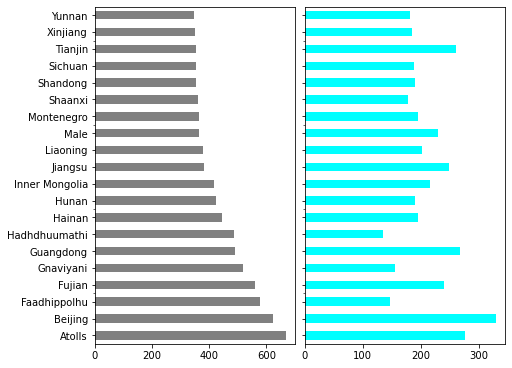

In [69]:
v = ds.query('Type == "Grey water"').groupby([ 'City']).sum().sort_values(
    by = 'value', ascending = False).head(20).reset_index()
v.rename(columns = {"value": "Grey water"}, inplace = True)

fig, ax = plt.subplots(1,2, figsize = (7,5), constrained_layout = True, sharey = True)

v.plot(x = 'City', ax = ax[0], kind= 'barh', legend = False, color = 'grey')

w.plot(x = 'City', ax = ax[1], kind= 'barh', legend = False, color = 'cyan')


for i in range(2):
    ax[i].set_ylabel('')